# Project: Investigate a Dataset (TMDB movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    
<li><a href="#wrangling">Data Wrangling</a>
    <ul>
        <li><a href="#gen_prop">General Properties</a></li>
        <li><a href="#data_cleaning">Data Cleaning</a></li>

        
    </ul>
</li>

<li><a href="#eda">Exploratory Data Analysis</a></li>

<li><a href="#conclusions">Conclusions</a></li>

</ul>

<a id='intro'></a>
## Introduction

I'm going to be investigating TMBT movies database data. The question I'm going to be asking are:

<ol>
    <li>
        <a href="#question-1">Does higher budget mean a higher rating</a>
    </li>
    <li>
        <a href="#question-2">What is a most popular genre</a>
    </li>
    <li>
        <a href="#question-3">Director received the most and the least budget through out their career</a>
    </li>
</ol>

In [19]:
# Importing all dependencies required to plot and calculate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>

## Data Wrangling

In this section of the report, I load in the data, check for cleanliness, and then trim and clean dataset for analysis.

<a id='gen_prop'></a>

### General Properties

In [20]:
# Load data
df = pd.read_csv("tmdb-movies.csv")
# Display first 5 rows
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> By looking at first few rows I clearly see that there are few columns that I won't be needing to answer my questions

> Columns that we could get rid of are as follow:
**id, imdb_id, homepage, tagline, keywords, overview, vote_count, budget_adj, revenue_adj, runtime, production_companies**

***

In [21]:
# Let's see details about each column to further help us with our analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

There is 10866 rows or data stored in 21 columns.
1. There is a lot of missing values for **homepage**, **production_companies** and **tagline** which makes them hot candidates of being removed from our dataset
2. **release_date** is currently stored as string. We need to convert it into datetime object

In [22]:
# Columns to drop from dataset
drop_columns_list = np.array(["id", "imdb_id", "homepage","vote_count","overview","tagline","budget_adj","revenue_adj", "keywords", "production_companies"])

## Let's get summary of null values for each columns that we are going to keep
def summarize_nan (dataset, exclude_columns=[]):
    """ Summarize values of dataset where values is null """
    return dataset[[x for x in dataset.columns.values if x not in exclude_columns]].isnull().sum()

nan_columns_count = summarize_nan(df, exclude_columns=drop_columns_list)
print(nan_columns_count)

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_average       0
release_year       0
dtype: int64


> There are approximately 150 Nan values in the dataset.

Let's see if **budget** or **revenue** have any 0 values. If so, we will replace them with nan and then remove all rows with Nan values

In [23]:
# Store columns that we want replace 0 with nan
to_replace_with_nan = ["budget", "revenue"]

# Return count of rows which have either budget or revenue 0
zero_values_count = df.query('budget == 0 or revenue == 0').shape[0]
print("There is {} rows with 0 value for either budget or revenue".format(zero_values_count))

There is 7011 rows with 0 value for either budget or revenue


<a id='data_cleaning'></a>

### Data Cleaning
#### We are going to take following steps to clean dataset based on observation
1. Drop unnecessary columns that we have already stored in ` drop_column_list `
2. Convert ` release_date` to datetime object
3. Replace 0 with Nan for **budget** and **revenue** columns
4. Drop rows that contain ` Nan ` values *( about 150 rows )*

In [24]:
# 1. let's drop columns that we do not need
df.drop(drop_columns_list, axis=1, inplace=True)

# check if columns have been droped
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015


> Columns have been removed and our data look much better

In [25]:
# 2. Convert release_date to datetime object
df["release_date"] = pd.to_datetime(df["release_date"])

# confirm that changes have been aplied
df.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
dtype: object

> Changes have been applied release_date is datetime object now

Before we remove all Nan values we want to replace 0 values with Nan for columns **budget** and **revenue**

In [26]:
df[to_replace_with_nan] = df[to_replace_with_nan].replace(0, np.NaN)

In [27]:
print(summarize_nan(df))

popularity           0
budget            5696
revenue           6016
original_title       0
cast                76
director            44
runtime              0
genres              23
release_date         0
vote_average         0
release_year         0
dtype: int64


> A lot of values for budget an revenue. But since we can not use 0 values we can drop them

In [28]:
# 3. Remove rows containing Nan values
df.dropna(inplace=True)
clean_rows_count = df.shape
print("Dataset contains {} rows and {} columns".format(clean_rows_count[0], clean_rows_count[1]))

Dataset contains 3850 rows and 11 columns


That's all the cleaning we needed to get done. Let's move towards analysing data. But just before we move to next part let's make sure that there are no duplicates in our dataset

In [29]:
# Check duplicates
df[df.duplicated()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year
2090,0.59643,30000000.0,967000.0,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,5.0,2010


There is one duplicated row. Let's drop it and we are good to go

In [30]:
df.drop_duplicates(inplace=True)
clean_rows_count = df.shape
print("Clean dataset contains {} rows and {} columns".format(clean_rows_count[0], clean_rows_count[1]))

Clean dataset contains 3849 rows and 11 columns


<a id='eda'></a>
## Exploratory Data Analysis

<a id="question-1"></a>
### Research Question 1: *Does higher budget means a higher rating?*


In [31]:
df.describe()

,popularity,budget,revenue,runtime,vote_average,release_year
count,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849.000000,3849.000000
mean,1.192933,3.724886e+07,1.078148e+08,109.217459,6.168693,2001.258249
std,1.475622,4.221699e+07,1.766175e+08,19.914141,0.794697,11.285642
min,0.001117,1.000000e+00,2.000000e+00,15.000000,2.200000,1960.000000
25%,0.463337,1.000000e+07,1.367069e+07,95.000000,5.700000,1995.000000
50%,0.798582,2.400000e+07,4.490726e+07,106.000000,6.200000,2004.000000
75%,1.374300,5.000000e+07,1.243052e+08,119.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,8.400000,2015.000000


> 75% of movies are below 50 milions for budget with average budget being 37 milions dollars
with highest budget being 425 milions dollars

> Average vote is 6.2 for this dataset with highest score being 8.4

> Around half of all movies in dataset has been realeased after 2004

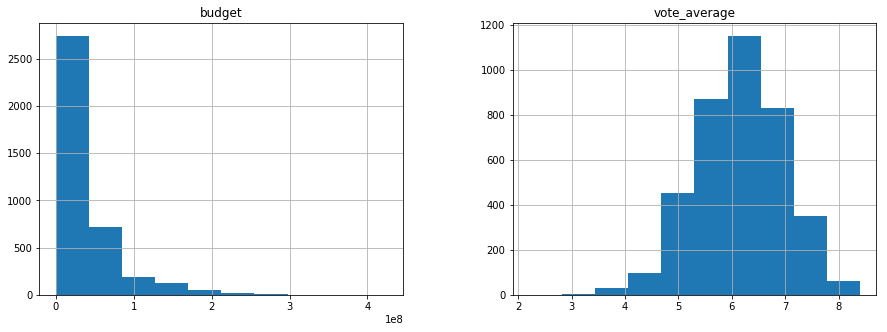

In [32]:
df[["budget", "vote_average"]].hist(figsize=(15,5));

> Budget is skewed to the right while votes being centered around 6 mark

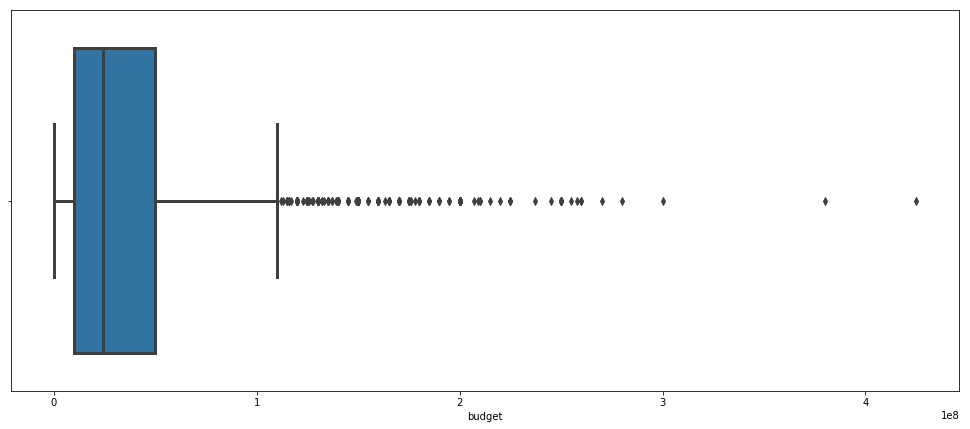

In [33]:
plt.figure(figsize=(17,7))
sns.boxplot(df["budget"], linewidth = 3)
plt.show()


> From graph above we can see that outliers are located mostly with budget being higher then 100 mil mark

In [34]:
def highest_and_lowest_row(dataset, column_name):
    """ Get highest and lowest rows from dataset"""
    highest_row_id = dataset[column_name].idxmax()
    highest_row_details = pd.DataFrame(dataset.loc[highest_row_id])
    
    lowest_row_id = dataset[column_name].idxmin()
    lowest_row_details = pd.DataFrame(dataset.loc[lowest_row_id])

    return pd.concat([highest_row_details, lowest_row_details], axis = 1)
    

highest_and_lowest_row(df, 'budget')


,2244,2618
popularity,0.25054,0.090186
budget,4.25e+08,1
revenue,1.10876e+07,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
vote_average,6.4,4.8


Well we know who received highest and lowest budget lets if there is any correlation between money spend and quality of the movie

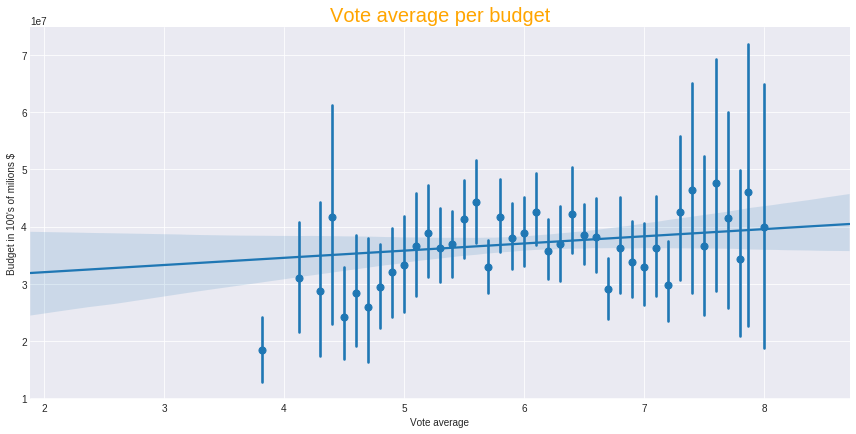

In [35]:
# Set up graph
plt.style.use('seaborn-darkgrid')
sns.lmplot(data=df, x="vote_average", y="budget", size=6, aspect=2, x_bins=200, fit_reg=True);

plt.title("Vote average per budget", fontsize=20, fontweight=34, color="orange");
plt.xlabel("Vote average");
plt.ylabel("Budget in 100's of milions $");


> Following chart seem to be suggesting that budget may play small role in what makes a good movie good

> Let's have a look at the Revenue

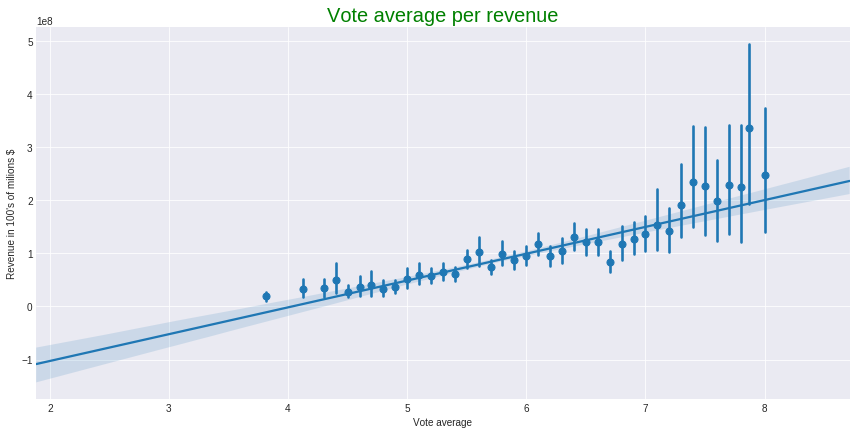

In [36]:
# Set up graph
plt.style.use('seaborn-darkgrid')
sns.lmplot(data=df, x="vote_average", y="revenue", size=6, aspect=2, x_bins=200, fit_reg=True);

plt.title("Vote average per revenue", fontsize=20, fontweight=34, color="green");
plt.xlabel("Vote average");
plt.ylabel("Revenue in 100's of milions $");


> When it comes to revenue, movies are earning more the higher the rating is.

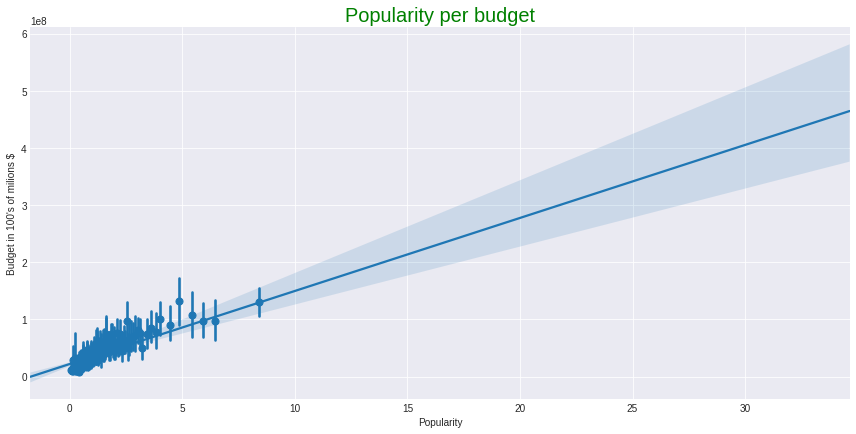

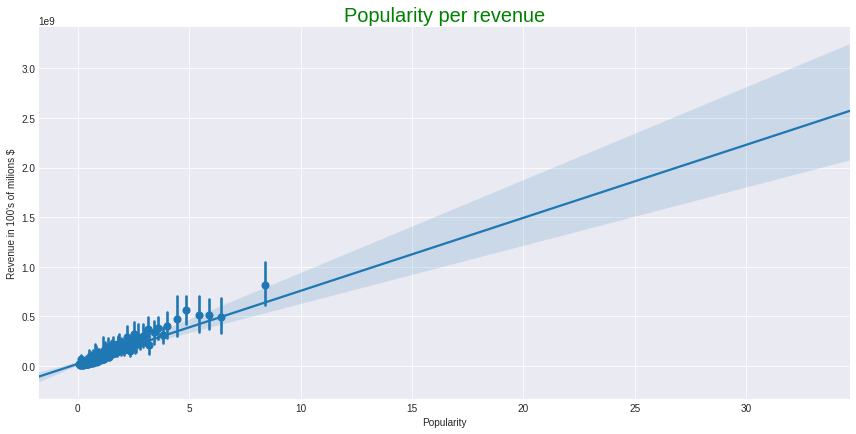

In [37]:
plt.style.use('seaborn-darkgrid')
sns.lmplot(data=df, x="popularity", y="budget", size=6, aspect=2, x_bins=200, fit_reg=True);

plt.title("Popularity per budget", fontsize=20, fontweight=34, color="green");
plt.xlabel("Popularity");
plt.ylabel("Budget in 100's of milions $");

sns.lmplot(data=df, x="popularity", y="revenue", size=6, aspect=2, x_bins=200, fit_reg=True);

plt.title("Popularity per revenue", fontsize=20, fontweight=34, color="green");
plt.xlabel("Popularity");
plt.ylabel("Revenue in 100's of milions $");

> Popularity of the movie has a positive correlation in both revenue and budget. This means the more money spent the more popular the movie is but not necessarily rated higher 


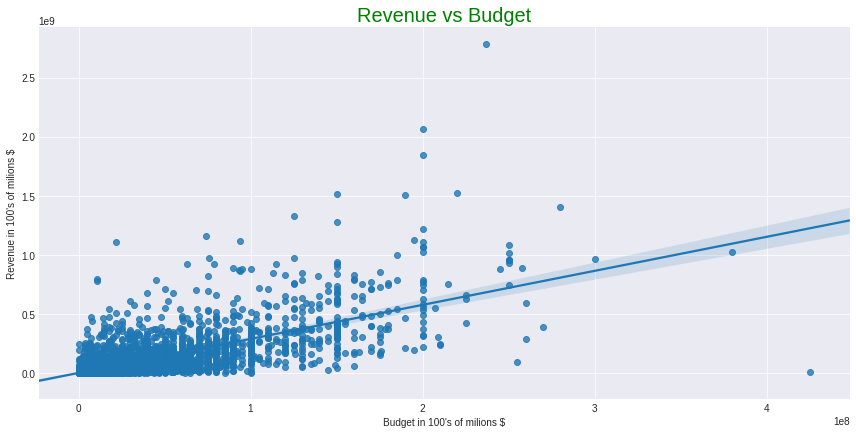

In [38]:
plt.style.use('seaborn-darkgrid')
sns.lmplot(data=df, x="budget", y="revenue", size=6, aspect=2, fit_reg=True);

plt.title("Revenue vs Budget", fontsize=20, fontweight=34, color="green");
plt.xlabel("Budget in 100's of milions $");
plt.ylabel("Revenue in 100's of milions $");

In [39]:
#Calculate Pearson's correlation coefficient
def correlation_coefficient(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return(std_x*std_y).mean()

cor_coe = correlation_coefficient(df['budget'],df['revenue'])
print("Correlation coefficient between budget and revenue: {}".format(cor_coe))

Correlation coefficient between budget and revenue: 0.6884031904522708


>From the uphill scatterplot and the value of 0.69 for the Pearson's coefficient, we can observe that there is a positive relationship between budget and revenue. We can deduct from the plot that there are some movies with high budgets but low revenues and some with low budgets and high revenues. The outliers are more with high budget movies which get low/ moderate revenues.

<a id="question-2"></a>
### Research Question 2: *What is a most popular genre?*

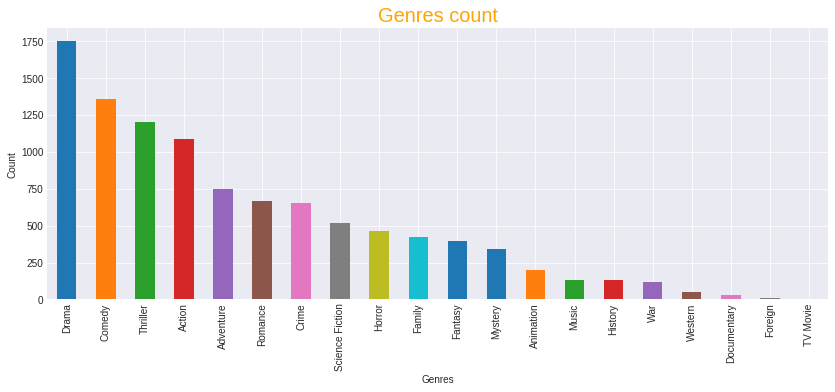

In [40]:
# Extract data from column
def extract_data(dataset, column_name):
    """Splits column and counts all values"""
    all_data = dataset[column_name].str.cat(sep = '|')
    all_data = pd.DataFrame(all_data.split('|'), columns=["Genres"])
        
    all_data = all_data.groupby("Genres")["Genres"].count().reset_index(name="Count")
    all_data = all_data.sort_values(by="Count", ascending=False)
    return all_data

# Draw genres count
split_column_count = extract_data(df, "genres")
split_column_count.plot(x="Genres", y="Count", kind="bar", figsize=(14, 5), legend=False);
plt.title("Genres count", fontsize=20, fontweight=34, color="orange")
plt.xlabel('Genres');
plt.ylabel('Count');

> The drama is clearly a winner if we look at the numbers

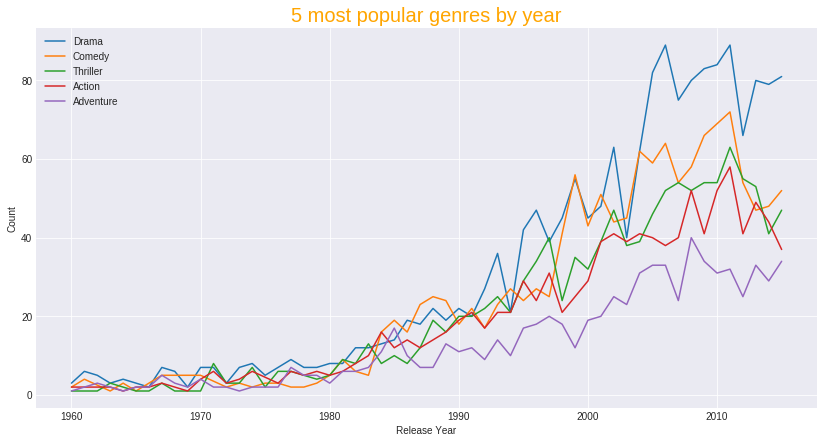

In [41]:
## Gets genre count
def get_count_for_genre_by_year(dataset, genre):
    df_genre = df[df["genres"].str.contains(genre)]
    return df_genre.groupby("release_year")["release_year"].count().reset_index(name="count")

## let's get 5 most popular genres
most_popular_genres = split_column_count["Genres"][:5].tolist()

fig, ax = plt.subplots()

for genre_name in most_popular_genres:
    df_current = get_count_for_genre_by_year(df, genre_name)
    ax = df_current.plot(ax=ax, x="release_year", y="count", kind="line", figsize=(14,7), label=genre_name)

plt.legend()
plt.title("5 most popular genres by year", fontsize=20, fontweight=34, color="orange")
plt.xlabel('Release Year');
plt.ylabel('Count');
plt.show()


> From line chart above we may see that drama indeed is and has been most popular genre since 60's except 80's where comedy was what people loved to watch

<a id="question-3"></a>
### Research Question 3: *Director received the most and the least budget through out their career*

In [42]:
# Sum budget for each director
most_budget = df.groupby("director")["budget"].sum().sort_values(ascending=False).reset_index(name="budget")
# Count movies for each director
movie_count = df.groupby("director")["director"].count().reset_index(name="movies_count")
# Join buget and movie counts
most_budget = most_budget.join(movie_count.set_index("director"), on="director")
most_budget.head(5)

,director,budget,movies_count
0,Steven Spielberg,1.551500e+09,27
1,Ridley Scott,1.482000e+09,21
2,Michael Bay,1.360000e+09,11
3,Peter Jackson,1.326000e+09,11
4,Gore Verbinski,1.193000e+09,9


> Steven Spielberg is clear winner here when it comes to budget recieved. Then number of movies could have part in that too

In [43]:
most_budget.tail(5)

,director,budget,movies_count
1705,Rusty Cundieff,6.0,1
1706,Taika Waititi,3.0,1
1707,John Harrison,3.0,1
1708,Jeff Pollack,1.0,1
1709,Dermot Mulroney,1.0,1


> Jeff Pollack and Dermot Mulroney are unfortunate directors from our dataset that received the least amount of money for their only one movie

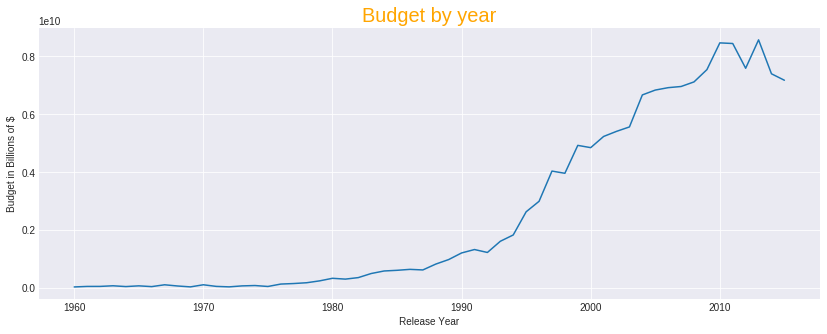

In [44]:
# plot budget per year
df.groupby("release_year")["budget"].sum().plot(x="release_year", y="budget", kind="line", figsize=(14,5));

plt.title("Budget by year", fontsize=20, fontweight=34, color="orange")
plt.xlabel('Release Year');
plt.ylabel("Budget in Billions of $");

> By looking at graph above there seem to explosion in money spend in movie industry from mid 90's

<a id='conclusions'></a>
## Conclusions

To conclude my findings I discovered that budget could have some part in the success of the movies but not necessarily, what this really means that quality of user impression cannot always be bought with money. 
The most money received for movie production was given to Steven Spielberg. That has not really surprised me as Steven is a great director and I've seen a lot of his movies

To my surprise drama seem to be a most popular genre since 1960 except some years that comedy took over.

Of course, that are limitations to this dataset. After I cleaned all the data I had only around 4000 records to do my research on, which is not a whole lot in the age of data. It's amazing how much data I had to remove before actually start working. I understand that this may not always be a case and I may work in future with much cleaner and bigger dataset. Perhaps Steven Spielberg would not be one who received the most money for movie production or drama would not be a most popular genre of all time.

This project taught me a lot about data and importance of cleaning them before drawing any conclusions. Can't wait to start working on next one

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0